### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


### Data Collection And Processing

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:

df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Encoding the Categorical Data

In [7]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)



C:\Users\Prasad\AppData\Local\Temp\ipykernel_8836\2980579683.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\Prasad\AppData\Local\Temp\ipykernel_8836\2980579683.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\Prasad\AppData\Local\Temp\ipykernel_8836\2980579683.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the data into Training and Testing Data

In [9]:
x = df.drop(columns = ['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [10]:
print(x.shape)
print(y.shape)

(301, 7)
(301,)


### Splitting Training and Testing Data

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
print(x_train.shape)
print(x_test.shape)

(210, 7)
(91, 7)


### Model Training

#### Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [14]:
## prediction on testing data
pred = lr.predict(x_test)
pred

array([ 2.84503948,  8.17433042,  6.15503229, -1.53474297,  9.10478102,
        7.12513416,  1.41208877,  0.85727713,  1.42824591,  7.18732696,
        8.77738476,  0.64604862,  8.19199294,  3.27496701,  6.58156734,
        3.12524913,  0.47776322, 10.71519858,  1.81845542,  2.3948969 ,
        0.40800604,  7.78763597,  6.25976337,  2.59710749,  0.8401473 ,
        3.68243396,  5.30447357,  2.81900104,  2.20840021,  1.82500826,
        0.41732684,  8.85691122, -0.6636885 ,  2.2707602 ,  8.2948583 ,
        4.51208942,  7.29749227,  7.54243321,  2.9482584 ,  7.9275823 ,
        3.90745022,  4.17258578,  4.31519575,  0.69858995,  7.02594603,
        0.53398622,  7.32449179, 11.09649499,  3.13148761,  5.06495644,
        6.60928574,  2.2345092 , 20.15115757, 16.47662698,  7.25913588,
        9.54127202,  4.43952683,  8.67649783,  1.75283042,  7.41244863,
        0.27553659, -2.53278607,  2.01366813, -1.56020807,  4.79226982,
        1.86019863, 19.80408464, 17.88217176,  5.42372796, -0.54

In [15]:
### R Square Error
error_score = metrics.r2_score(y_test,pred)
print('R Square Error',error_score)

R Square Error 0.8773175030337906


### Visualization actual price and predicted prices

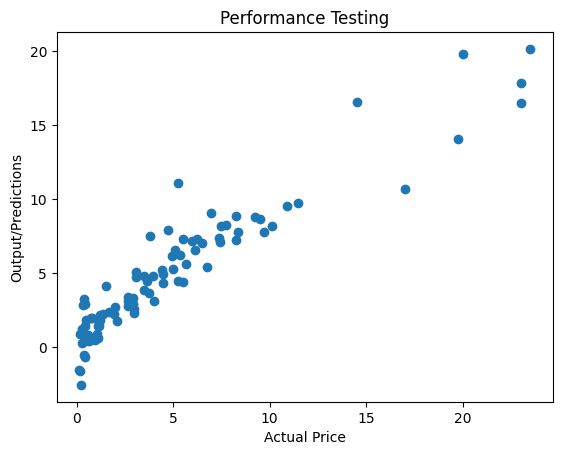

In [16]:
plt.scatter(y_test,pred)
plt.title('Performance Testing')
plt.xlabel('Actual Price')
plt.ylabel('Output/Predictions')
plt.show()

### Lasso Regression

In [17]:
lasso = Lasso()
lasso.fit(x_train,y_train)


Lasso()

In [18]:
pred2 = lasso.predict(x_test)
pred2

array([ 2.00205505,  8.38911747,  4.93553383,  0.44656319,  9.79709818,
        5.68161729,  2.12919963,  1.61570894,  2.0292336 ,  5.86929965,
        7.19789073,  1.49614559,  7.0103341 ,  2.36959846,  5.30008347,
        3.02662125,  1.420098  , 11.15003342,  2.35369479,  3.00585217,
        1.22419269,  6.31257833,  5.05111384,  2.65735954,  1.59817993,
        3.77144831,  5.49422581,  2.91124051,  2.7956607 ,  2.47909836,
        1.23519166,  7.76246876,  0.36274208,  2.64272043,  6.88972153,
        4.47733299,  7.75346027,  8.49758725,  2.82529512,  8.81558865,
        4.84935269,  3.64013369,  4.2525419 ,  1.43970841,  5.56827863,
        1.36909914,  7.66358439, 10.77528926,  3.02988025,  3.69990713,
        5.33683957,  2.82447428, 18.80394381, 14.40428363,  5.83550124,
        8.30654779,  4.27483097,  7.32102156,  2.28910428,  5.89344004,
        1.07612555, -0.33410664,  2.57425532, -0.41634545,  4.67786682,
        2.51793405, 18.52708766, 16.2330288 ,  5.39124006,  0.38

In [19]:
### R Square Error
error_score2 = metrics.r2_score(y_test,pred2)
print('R Square Error for Lasso regressor : ',error_score2)

R Square Error for Lasso regressor :  0.8396199056735947


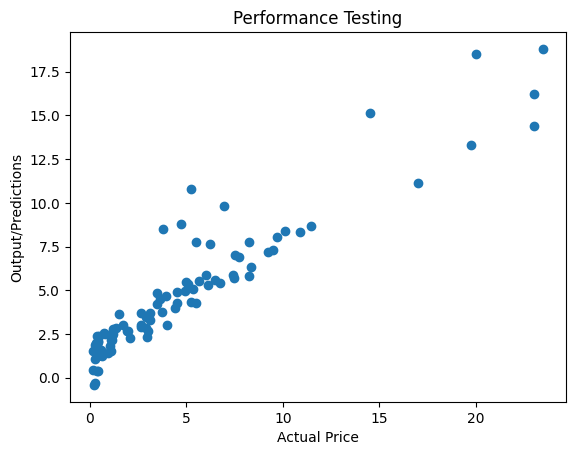

In [20]:
plt.scatter(y_test,pred2)
plt.title('Performance Testing')
plt.xlabel('Actual Price')
plt.ylabel('Output/Predictions')
plt.show()